In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mona lisa.jpg to mona lisa.jpg
Saving Lena.bmp to Lena.bmp


آپلود کردن عکس ها

In [ ]:
import cv2
import numpy as np
import math
from PIL import Image
from skimage.io import imread
from io import BytesIO
from matplotlib import pyplot as plt


ایمپورت کردن لایبری ها

In [ ]:
IMAGE_LOCATION = "Lena.bmp"
baboon = "Baboon.bmp"

در این تمرین ابتدا عکس را به تابع زیر داده و به تبدیل تصاویر ق‌س‌آ به اچ‌اس‌آی که در سه مرحله صورت می گیرد میپردازیم

خواندن تصویر مربوطه

نمایش تصویر اصبلی در سه مد رنگی تشکیل دهنده اصلی ق-س-آ

محاسبه مقدار اچ‌اس‌آی بر اساس مقادیر ق‌س‌آ بر اساس فرمول زیر


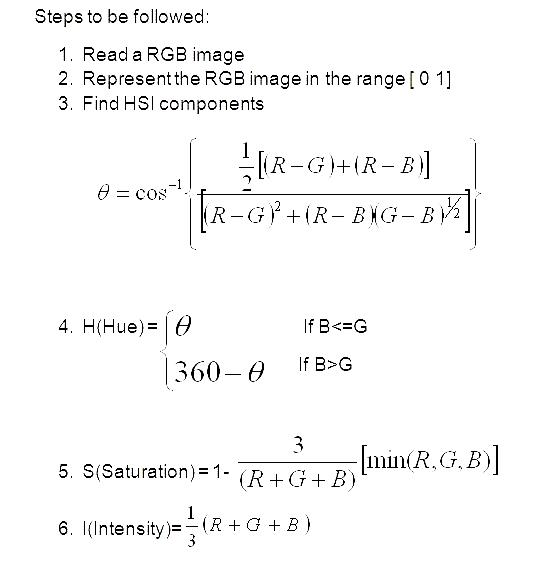

6.1.1. Convert Lena to HSI format, and display the HIS components as separate grayscale images. Observe these 
images to comment on what does each of the H, S, I components represent. The HSI images should be saved in 
double precision

In [ ]:
class RGB2HSI_Coverter:
    def __init__(self, img):
        self.img = img

    # Method calculates the intensity
    # I = (R + G + B) / 3
    @staticmethod
    def calc_intensity(split):
        (R, G, B) = split
        return np.divide(R + G + B, 3)

    # Method calculates the saturation
    # S = 1 - (3 * min[R,G,B]) / (R + G + B)
    @staticmethod
    def calc_saturation(split):
        (R, G, B) = split
        min_value = np.minimum(np.minimum(R, G), B)
        return 1 - np.divide(3 * min_value, (R + G + B))

    # Method calculates the hue
    # H = theta if B <= G, otherwise 360 - theta
    # Where theta = arccos(( 0.5 * [(R - G) + (R - B)] ) / ([(R - G)^2 + (R - B)(G - B)]^0.5))
    @staticmethod
    def calc_hue(split):
        (R, G, B) = split
        result_hue = np.copy(R)

        for i in range(0, B.shape[0]):
            for j in range(0, B.shape[1]):
                # Calculate numerator = ( 0.5 * [(R - G) + (R - B)] )
                numerator = 0.5 * ((R[i][j] - G[i][j]) + (R[i][j] - B[i][j]))
                
                # Calculate denominator = ([(R - G)^2 + (R - B)(G - B)]^0.5)
                denominator = math.sqrt((R[i][j] - G[i][j])**2 + ((R[i][j] - B[i][j]) * (G[i][j] - B[i][j])))
                
                # Calculate divistion = numerator / denominator
                divistion = np.divide(numerator, denominator)
                
                # Calculate theta = arccos(divistion)
                result_hue[i][j] = math.acos(divistion)

                # If B > G then H = 360 - theta
                if B[i][j] > G[i][j]:
                    result_hue[i][j] = ((360 * math.pi) / 180.0) - result_hue[i][j]

        return result_hue
        
    def convert_R2G_to_HSI(self):
        with np.errstate(divide='ignore', invalid='ignore'):
            # Split into channels
            block = np.float32(self.img) / 255
            split = (block[:,:,2], block[:,:,1], block[:,:,0])
            
            # Calculate saturation
            saturation = self.calc_saturation(split) 
            
            # Calculate intensity
            intensity = self.calc_intensity(split)
           
            # Calculate hue
            hue = self.calc_hue(split)
            
            # Merge channels into one image
            hsi_img = cv2.merge((hue, saturation, intensity))


            figure = plt.figure(figsize=(15,15))

            figure.add_subplot(1,3,1)
            plt.title("hue")
            plt.imshow(hue, cmap="gray")
            ## median
            figure.add_subplot(1,3,2)
            plt.title("saturation")
            plt.imshow(saturation, cmap="gray")
            ## unsharp masking
            figure.add_subplot(1,3,3)
            plt.title("intensity")
            plt.imshow(intensity, cmap="gray")


            return hsi_img

سپس با استفاده از تابع بالا عکس اصلی را تبدیل کرده و دراخر تابع مرج انجام میدهیم و عکس هارا به صورت جداگانه نمایش داده و مقایسه میکنیم

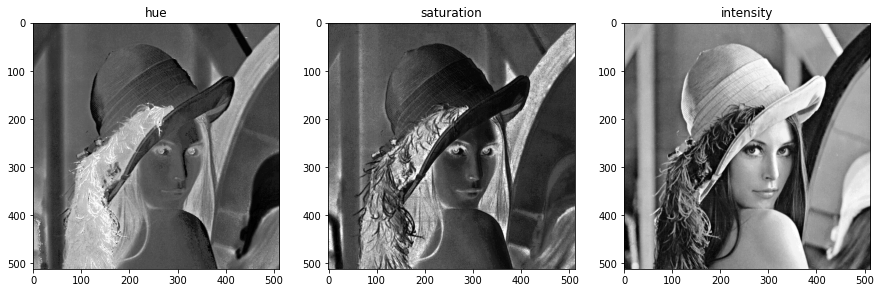

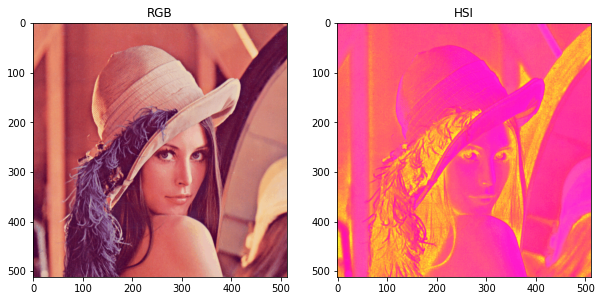

In [ ]:
def main():
    # Load RGB image
    img = Image.open(IMAGE_LOCATION).convert("RGB")

    # Convert RGB image to HSI
    converter = RGB2HSI_Coverter(img)
    hsi = converter.convert_R2G_to_HSI()

    # Display HSI and RGB image
    figure = plt.figure(figsize=(10,10))
    figure.add_subplot(1,2,1)
    plt.title("RGB")
    plt.imshow(img, cmap="gray")
    ## median
    figure.add_subplot(1,2,2)
    plt.title("HSI")
    plt.imshow(hsi, cmap="gray")


if __name__ == "__main__":
    main()


6.1.2

Adobe RGB

The Adobe RGB color space was developed by Adobe Systems in 1998. It was designed to encompass most of the colors achievable on CMYK color printers, but by using RGB primary chromaticities on a device such as the computer display. The Adobe RGB color space encompasses roughly 50% of the visible colors specified by the Lab color space, improving upon the gamut of the sRGB color space primarily in cyan-greens.
*********************************************************************
CIELAB produces a color space that is more perceptually linear than other color spaces. Perceptually linear means that a change of the same amount in a color value should produce a change of about the same visual importance. CIELAB has almost entirely replaced an alternative related Lab color space called “Hunter Lab”. This space is commonly used for surface colors, but not for mixtures of (transmitted) light.
*********************************************************************
The analogue YUV and digital YCbCr refer to a variety of linear methods to try to separate lightness from chroma signals in an RGB input using linear combination. As the input RGB values are gamma-corrected, such a separation does not truly produce lightness and two chroma signals, but a "luma" signal and two "chrominance" signals instead.

YUV is originally used in video: as human eyes have less resolution in its color perception, it is more economic to put more of the bandwidth in encoding Luma. The same principle is used in YCC. In YCC, separating also has the added benefit of removing most of the correlation between the input channels, therefore providing better compression.

YCoCg is a version of YCbCr with extremely simple coefficients. It results in faster computation, lossless conversion, and apparently better decorrelation.

ICtCp is used similarly to YCC in video compression, but is more appropriately described as a high dynamic range uniform color space.

********************************************************************
LCh: uniform color space
For uniform color spaces that already have a lightness component, the transformation only involves rearranging the two chroma values into colorfulness (C) and hue (h).

CIELChab and CIELChuv are cylindrical transformations of the CIELAB and CIELUV color spaces, respectively. The cylindrical coordinates C* (chroma, relative saturation) and h° (hue angle, angle of the hue in the color wheel) are specified. The CIELAB and CIELUV coordinate L* (lightness) remains unchanged.

The newer UCS systems can also be applied to a similar transform. In fact, both IPT and OKLab/OKLCH are designed for hue uniformity, a feature that is only explicitly shown after a cylindrical transformation.

In [ ]:
def get_region_index_8(color_value):
    # colors divided into 8 regions for each color space
    eight_regions = [[0,31], [32,63], [64,95], [96,127], [128,159], [160,191], [192,223], [224,255]]
    for index, region_value in enumerate(eight_regions):
        if color_value >= region_value[0] and  color_value <= region_value[1]:
            return index

def get_region_index_4(color_value):
    # colors divided into 8 regions for each color space
    four_regions = [[0,63], [64,127], [128,191], [192,255]]
    for index, region_value in enumerate(four_regions):
        if color_value >= region_value[0] and  color_value <= region_value[1]:
            return index

def get_region_index_2(color_value):
    # colors divided into 8 regions for each color space
    four_regions = [[0,127], [128,255]]
    for index, region_value in enumerate(four_regions):
        if color_value >= region_value[0] and  color_value <= region_value[1]:
            return index

6.2.2

هدف این تمرین تبدیل کردن و کاهش تعداد رنگ های تصویر بود که رنگ های قرمز و سبز   در ۸ سطح و آبی در ۴ سطح طبقه بندی شود و درکل 256 رنگ داشته باشیم

In [ ]:
r_region_mappings = [[],[],[],[],[],[],[],[]]
g_region_mappings = [[],[],[],[],[],[],[],[]]
b_region_mappings = [[],[],[],[]]    

img = imread(IMAGE_LOCATION)
# loop through all pixels and the put the colors into the respective color regions
for rows in img:
    for pixel in rows:
        red = pixel[0]
        green = pixel[1]
        blue = pixel[2]
        #find the index where the color is supposed to go and add it
        r_region_mappings[get_region_index_8(red)].append(red)
        g_region_mappings[get_region_index_8(green)].append(green)
        b_region_mappings[get_region_index_4(blue)].append(blue)
        
# find the color that represents each region
r_representative_color_per_region = [0,0,0,0,0,0,0,0]
g_representative_color_per_region = [0,0,0,0,0,0,0,0]
b_representative_color_per_region = [0,0,0,0]

for index in range(8):
    r_representative_color_per_region[index] = np.mean(r_region_mappings[index]).astype(int)
    g_representative_color_per_region[index] = np.mean(g_region_mappings[index]).astype(int)
for index in range(4):
    b_representative_color_per_region[index] = np.mean(b_region_mappings[index]).astype(int)

new_elena = np.copy(img)
for rindex, rows in enumerate(img):
    for cindex, pixel in enumerate(rows):
        red = pixel[0]
        green = pixel[1]
        blue = pixel[2]
        new_elena[rindex, cindex][0] = r_representative_color_per_region[get_region_index_8(red)]
        new_elena[rindex, cindex][1] = g_representative_color_per_region[get_region_index_8(green)]
        new_elena[rindex, cindex][2] = b_representative_color_per_region[get_region_index_4(blue)]

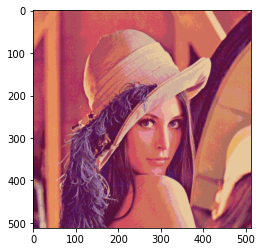

In [ ]:
plt.imshow(new_elena)

6.2.3

در این تمرین مانند تمرین بالا هدف کاهش رنگ های تصویر است با این تفاوت که در تمرین پیش باید به 256 رنگ کاهش پیدا میکرد اما در این تمرین به 32و16و8 رنگ کاهش پیدا کند که به ترتیب برای رنگ های قرمز سبز و آبی 4/4/2 و 4/2/2 و 2/2/2 بیت باید در نظر گرفته شود

In [ ]:
r_region_mappings = [[],[],[],[]]
g_region_mappings = [[],[],[],[]]
b_region_mappings = [[],[]]    

img = imread(baboon)
# loop through all pixels and the put the colors into the respective color regions
for rows in img:
    for pixel in rows:
        red = pixel[0]
        green = pixel[1]
        blue = pixel[2]
        #find the index where the color is supposed to go and add it
        r_region_mappings[get_region_index_4(red)].append(red)
        g_region_mappings[get_region_index_4(green)].append(green)
        b_region_mappings[get_region_index_2(blue)].append(blue)
        
# find the color that represents each region
r_representative_color_per_region = [0,0,0,0]
g_representative_color_per_region = [0,0,0,0]
b_representative_color_per_region = [0,0]

for index in range(4):
    r_representative_color_per_region[index] = np.mean(r_region_mappings[index]).astype(int)
    g_representative_color_per_region[index] = np.mean(g_region_mappings[index]).astype(int)
for index in range(2):
    b_representative_color_per_region[index] = np.mean(b_region_mappings[index]).astype(int)

new_baboon = np.copy(img)
for rindex, rows in enumerate(img):
    for cindex, pixel in enumerate(rows):
        red = pixel[0]
        green = pixel[1]
        blue = pixel[2]
        new_baboon[rindex, cindex][0] = r_representative_color_per_region[get_region_index_4(red)]
        new_baboon[rindex, cindex][1] = g_representative_color_per_region[get_region_index_4(green)]
        new_baboon[rindex, cindex][2] = b_representative_color_per_region[get_region_index_2(blue)]

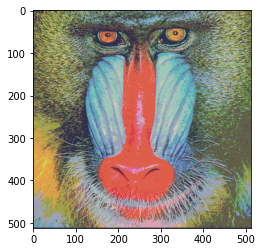

In [ ]:
plt.imshow(new_baboon)

In [ ]:
r_region_mappings = [[],[],[],[]]
g_region_mappings = [[],[]]
b_region_mappings = [[],[]]    

img = imread(baboon)
# loop through all pixels and the put the colors into the respective color regions
for rows in img:
    for pixel in rows:
        red = pixel[0]
        green = pixel[1]
        blue = pixel[2]
        #find the index where the color is supposed to go and add it
        r_region_mappings[get_region_index_4(red)].append(red)
        g_region_mappings[get_region_index_2(green)].append(green)
        b_region_mappings[get_region_index_2(blue)].append(blue)
        
# find the color that represents each region
r_representative_color_per_region = [0,0,0,0]
g_representative_color_per_region = [0,0]
b_representative_color_per_region = [0,0]

for index in range(4):
    r_representative_color_per_region[index] = np.mean(r_region_mappings[index]).astype(int)
    
for index in range(2):
    g_representative_color_per_region[index] = np.mean(g_region_mappings[index]).astype(int)
    b_representative_color_per_region[index] = np.mean(b_region_mappings[index]).astype(int)

new_baboon_16 = np.copy(img)
for rindex, rows in enumerate(img):
    for cindex, pixel in enumerate(rows):
        red = pixel[0]
        green = pixel[1]
        blue = pixel[2]
        new_baboon_16[rindex, cindex][0] = r_representative_color_per_region[get_region_index_4(red)]
        new_baboon_16[rindex, cindex][1] = g_representative_color_per_region[get_region_index_2(green)]
        new_baboon_16[rindex, cindex][2] = b_representative_color_per_region[get_region_index_2(blue)]

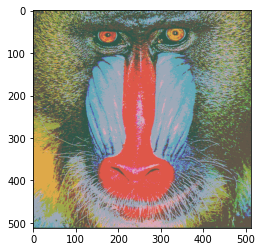

In [ ]:
plt.imshow(new_baboon_16)

In [ ]:
r_region_mappings = [[],[]]
g_region_mappings = [[],[]]
b_region_mappings = [[],[]]    

img = imread(baboon)
# loop through all pixels and the put the colors into the respective color regions
for rows in img:
    for pixel in rows:
        red = pixel[0]
        green = pixel[1]
        blue = pixel[2]
        #find the index where the color is supposed to go and add it
        r_region_mappings[get_region_index_2(red)].append(red)
        g_region_mappings[get_region_index_2(green)].append(green)
        b_region_mappings[get_region_index_2(blue)].append(blue)
        
# find the color that represents each region
r_representative_color_per_region = [0,0]
g_representative_color_per_region = [0,0]
b_representative_color_per_region = [0,0]
    
for index in range(2):
    r_representative_color_per_region[index] = np.mean(r_region_mappings[index]).astype(int)
    g_representative_color_per_region[index] = np.mean(g_region_mappings[index]).astype(int)
    b_representative_color_per_region[index] = np.mean(b_region_mappings[index]).astype(int)

new_baboon_8 = np.copy(img)
for rindex, rows in enumerate(img):
    for cindex, pixel in enumerate(rows):
        red = pixel[0]
        green = pixel[1]
        blue = pixel[2]
        new_baboon_8[rindex, cindex][0] = r_representative_color_per_region[get_region_index_2(red)]
        new_baboon_8[rindex, cindex][1] = g_representative_color_per_region[get_region_index_2(green)]
        new_baboon_8[rindex, cindex][2] = b_representative_color_per_region[get_region_index_2(blue)]

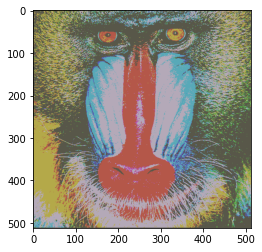

In [ ]:
plt.imshow(new_baboon_8)